In [1]:
# Note: please install required libraries before importing them!
# Import required libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

/Users/nabin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Basemap and Projection

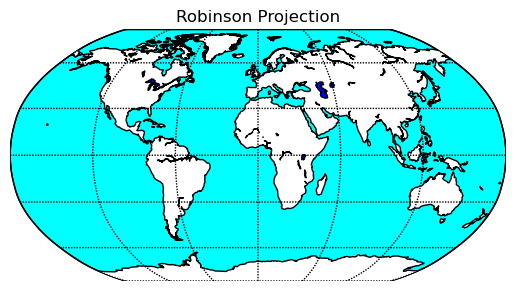

In [2]:
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
# Basemap setup - Robinson Projection (projection type can be changed based on need)
robin = Basemap(projection='robin',lon_0=0,resolution='c')
robin.drawcoastlines()
robin.fillcontinents(color='white',lake_color='blue')
# draw parallels and meridians.
robin.drawparallels(np.arange(-90.,120.,30.))
robin.drawmeridians(np.arange(0.,360.,60.))
robin.drawmapboundary(fill_color='aqua') 
#robin.bluemarble()
plt.title("Robinson Projection")
plt.show()

# Plot data on the map and save as a high resolution image

In [ ]:
# Plot world heritage sites data from https://whc.unesco.org/en/list/

# Create a Basemap instance
study_loc = Basemap(lat_0=0, lon_0=0, projection='robin')

# Draw the map boundary and fill continents
study_loc.drawmapboundary(fill_color='white')
study_loc.fillcontinents(color='orange', alpha=.25)

# Read the shapefile
shapefile_path = "whc-sites-2023.shp"  # path of your shapefile
gdf = gpd.read_file(shapefile_path, encoding='utf-8')

# Define a dictionary to map categories to colors
category_colors = {'Cultural': 'red', 'Natural': 'green', 'Mixed': 'blue'}  # Add more categories and colors as needed


# Plot points from the shapefile and store coordinates for legend
legend_cats = []  # List to store legend categories
legend_labels = []   # List to store legend labels
legend_coords = []


for index, row in gdf.iterrows():
    lon, lat = row.geometry.x, row.geometry.y
    x, y = study_loc(lon, lat)
    # Get the category from the shapefile (Category from the desired column)
    category = row['category']  # Category column from the shapefile  
    # Use the category to select color from the dictionary, default to black if category not found
    color = category_colors.get(category, 'black')
    study_loc.plot(x, y, marker='o', color=color, markersize=3)
    legend_coords.append((lon, lat))  # Append coordinates for legend
    
    # Check if the category is not already in the legend labels
    if category not in legend_labels:
        legend_labels.append(category)  # Add category to the legend labels
        legend_cats.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5))
# Add legend
plt.legend(legend_cats, legend_labels, loc='lower center', prop={'family': 'Arial'}, ncol=3)

# Set figure size and resolution
plt.gcf().set_size_inches(7.0866, 4)  # 180 mm width, 300 dpi
plt.savefig('world_heritage_map.png', dpi=300)  # Save the figure with 300 dpi resolution

# Display the map with shapefile and legend
plt.show()



## References
##### UNESCO, World Heritage List (https://whc.unesco.org/en/list/)
##### https://matplotlib.org/cheatsheets/